# Spotify Analysis: Predicting Song Popularity

## 1 Introduction

Musicality is intrinsic to humans, and its complex patterns have the power to communicate emotions, moods, or affective mental states, improving our quality of life (J. Zatorre, 2018). That is one of the main reasons for the music industry's enormous role in the economy, society, and culture. However, at the beginning of the 21st century, digital piracy forced its transformation and made streaming music business models an essential component of its revenue (Thomes, 2013). In fact, in 2020, total streaming (including both paid subscription and advertising-supported) reached 83% of the global recorded music revenues (Recording Industry Association of America - Year-End Report, 2020). This demonstrates the relevance of research on this sector and, especially, on the major hits that increase the popularity of the services and their revenue. 

In this project, we used a database from Kaggle collected in December 2020 using the Spotify Application Programming Interface (API). As one of the major players in this field, Spotify serves as an excellent case study to represent the sector on a smaller scale. The database is called "data_by_genres_o.csv" and contains information on the mode, genres, acousticness, danceability, duration, energy, instrumentalness, liveness, speechiness, tempo, valance, and key of over 600,000 tracks in a csv file. Furthermore, each category is defined within the database. In the aggregation process, means were calculated for numerical variables and modes for categorical ones. Attached to each genre is also their popularity score based on total plays and recency. 

As mentioned above, understanding what triggers the popularity of songs and being able to predict it, is vital to the identification of trends and the determination of growth projections and business decisions within this industry sector. To advance knowledge on this topic, this research investigates the questions: 

<div align="center"><strong>Can we predict if a particular song is likely to be popular?<strong></div>

<div align="center"><strong>If so, which features can best determine a song's popularity?<strong></div>
 
 
This study uses data analysis to identify attributes correlated to popularity and develops a K- nearest neighbours regression and a linear regression model to quantifiably predict a song's popularity using the identified attributes. Finally, it discusses the merits and flaws of both models, their possible applications, and areas for future research.

## 2 Preliminary Exploratory Data Analysis
### 2.1 Running Necessary Packages

In [6]:
library(tidyverse) #basic data wrangling
library(tidymodels) #knn regression and linear regression
library(GGally) #ggpairs multivariate analysis
library(cowplot)

### 2.2 Reading and Tidying Data

As a first step, we used the read_csv function to load the from the original source on the web. Next, we considered that wrangling and tidying is a necessary first step to all data analysis procedures. From the raw dataset imported, we manually sort through them to find 3 categorical and 11 quantitative variables. Because the raw data already followed the general guidelines of tidy data and our check for NA values guaranteed the absence of such values (as noted in the code), the only step left in tidying was to `mutate` the categorical variables into factor types. This communicates to R that the variables mode, key and genres should be treated as discrete values -- streamlining and improving the quality of plots for the rest of the analysis. 

In [7]:
options(scipen = 999) #Non-scientific notation

#Disclaimer:
#As of August 14th, it was noted that the kaggle (dataset page)[https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks] that contained the original 
#datasets for this project had been removed. This will not affect the resources necessary for this project as they have been backed up to an online repository.

genre_data = read_csv("https://raw.githubusercontent.com/paulh777/dsci100prj/main/proposal/data_by_genres.csv")

#Mutating the categorical variables as factors
popularity_data = genre_data %>%
    mutate(mode = as_factor(mode))%>%
    mutate(key = as_factor(key))%>%
    mutate(genres = as_factor(genres))

which(is.na(popularity_data))
popularity_data = na.omit(popularity_data)

#Which and na.omit executed to check for any missing value observations as they could result in NA values
#in downstream calculations of the regression models decreasing the effectiveness of the model.

#Fortunately, no NA values were found.

#Table Preview, finally,  we used the head function to preview the now wangled and the data to evaluate 
# the dataset qualitatively and evaluate the next steps. 
popularity_data %>% head(10) 

Parsed with column specification:
cols(
  mode = col_double(),
  genres = col_character(),
  acousticness = col_double(),
  danceability = col_double(),
  duration_ms = col_double(),
  energy = col_double(),
  instrumentalness = col_double(),
  liveness = col_double(),
  loudness = col_double(),
  speechiness = col_double(),
  tempo = col_double(),
  valence = col_double(),
  popularity = col_double(),
  key = col_double()
)



integer(0)

mode genres                 acousticness danceability duration_ms energy    
1  1    21st century classical 0.9793333    0.1628833     160297.7   0.07131667
2  1    432hz                  0.4947800    0.2993333    1048887.3   0.45067833
3  1    8-bit                  0.7620000    0.7120000     115177.0   0.81800000
4  1    []                     0.6514170    0.5290926     232880.9   0.41914607
5  1    a cappella             0.6765573    0.5389612     190628.5   0.31643357
6  1    abstract               0.4592100    0.5161667     343196.5   0.44241667
7  1    abstract beats         0.3421467    0.6230000     229936.2   0.52780000
8  1    abstract hip hop       0.2438541    0.6945709     231849.2   0.64623464
9  0    accordeon              0.3230000    0.5880000     164000.0   0.39200000
10 1    accordion              0.4461250    0.6248125     167061.6   0.37343750
   instrumentalness liveness   loudness   speechiness tempo    valence  
1  0.606833670      0.36160000 -31.514333 0.04056667   75.3365 0.1037833
2  0.477761667      0.13100000 -16.854000 0.07681667  120.2857 0.2217500
3  0.876000000      0.12600000  -9.180000 0.04700000  133.4440 0.9750000
4  0.205309190      0.21869585 -12.288965 0.10787156  112.8574 0.5136043
5  0.003003441      0.17225414 -12.479387 0.08285144  112.1104 0.4482487
6  0.849666667      0.11806667 -15.472083 0.04651667  127.8858 0.3073250
7  0.333602612      0.09965333  -7.918000 0.11637333  112.4138 0.4935067
8  0.024231263      0.16854292  -7.349328 0.21425770  108.2450 0.5713909
9  0.441000000      0.07940000 -14.899000 0.07270000  109.1310 0.7090000
10 0.193738394      0.16030000 -14.487063 0.07853750  112.8724 0.6586875
   popularity key
1  27.83333   6  
2  52.50000   5  
3  48.00000   7  
4  20.85988   7  
5  45.82007   7  
6  43.50000   1  
7  58.93333   10 
8  39.79070   2  
9  39.00000   2  
10 21.93750   2

### 2.3 Initial Split

When we split our data into its training and testing sets, we chose a 50/50 split (50% of the data in each subset) because the dataset has 2,973 observations. The number of observations was deemed by our group to be reasonably large enough to allow for sufficient observations to be dedicated to the testing set without compromising the accuracy of the training side. In the subsequent steps of this research, we used the training set to train both the KNN and the linear regression models and the test set to evaluate their accuracy.

In [8]:
#Initial Split
set.seed(4002)
popularity_num = popularity_data%>%
    select(-key,-genres,-mode) #Removing categorical variables

popularity_split = initial_split(popularity_num, prop = 0.5, strata = popularity)
popularity_training = training(popularity_split) #Training set
popularity_testing = testing(popularity_split)   #Testing Set

### 3 Exploratory Data Analysis
#### 3.1 Summary Table of Quantitative Variables

To get a summary of the variable characteristics, we decide to calculate the `max`, `min`, `median`, and the `sd` (standard deviation) of each variable within our training dataset. The specific steps for this are annotated in the code. The summary table that arises as a result of these calculations gives us valuable information that is analyzed in later steps and in the context of other exploratory analyses.

In [9]:
#Summary Table of Quantitative Variables

#Converted the `duration` variable from  milliseconds to minutes just for this table for better interpretation and readability.
popularity_num2 = popularity_training%>%
    mutate(duration_min=duration_ms/60000)%>%
    select(-duration_ms)

popularity_max = popularity_num2 %>% #Using `map_df` to apply the calculation function to every row.
    map_df(max, na.rm=TRUE)

popularity_min = popularity_num2 %>%
    map_df(min, na.rm=TRUE)

popularity_mean = popularity_num2 %>%
    map_df(mean, na.rm=TRUE)

popularity_median = popularity_num2 %>%
    map_df(median, na.rm=TRUE)

popularity_sd = popularity_num2 %>%
    map_df(sd, na.rm=TRUE)

#Before we can combine the 5 summary statistic tables, we wrangle the data so it is in tidy format using `pivot_longer`.
popularity_max = popularity_max %>%
    pivot_longer(
        cols = acousticness:duration_min,
        names_to = "variable",
        values_to = "max"
    )

popularity_min = popularity_min %>%
    pivot_longer(
        cols = acousticness:duration_min,
        names_to = "remove1",
        values_to = "min"
    )

popularity_mean = popularity_mean %>%
    pivot_longer(
        cols = acousticness:duration_min,
        names_to = "remove2",
        values_to = "mean"
    )

popularity_median = popularity_median %>%
    pivot_longer(
        cols = acousticness:duration_min,
        names_to = "remove3",
        values_to = "median"
    )

popularity_sd = popularity_sd %>%
    pivot_longer(
        cols = acousticness:duration_min,
        names_to = "remove4",
        values_to = "standard_deviation"
    )

#Combining the separate tables into one one comprehensive table using `bind_cols`.
popularity_table = popularity_max %>%
    bind_cols(popularity_min)%>%
    bind_cols(popularity_mean)%>%
    bind_cols(popularity_median)%>%
    bind_cols(popularity_sd)%>%
    select(variable,max,min,mean,median,standard_deviation)

popularity_table

variable         max         min          mean         median      
1  acousticness       0.9960000   0.00000348   0.40783493   0.33375570
2  danceability       0.9290000   0.05690000   0.53307518   0.54288008
3  energy             0.9946667   0.00100150   0.55257797   0.58989857
4  instrumentalness   0.9920000   0.00000000   0.21510224   0.08556088
5  liveness           0.8642500   0.02390000   0.19213998   0.17886120
6  loudness          -0.2530000 -41.82500000 -10.70272787  -9.37549702
7  speechiness        0.9200000   0.02510000   0.08167995   0.05893756
8  tempo            198.0750000  56.43600000 118.52444160 118.43584954
9  valence            0.9754000   0.00335250   0.48503055   0.48854529
10 popularity        80.6666667   0.00000000  40.06326887  43.05936546
11 duration_min      27.0333333   0.51576667   4.19389187   3.96218090
   standard_deviation
1   0.32295444       
2   0.15373065       
3   0.23816940       
4   0.26980927       
5   0.09095803       
6   5.53604635       
7   0.07552097       
8  17.30560463       
9   0.20315703       
10 16.71171375       
11  1.61438594

#### 3.2 Spread Visualization: Histogram of Popularity

To further explore the target variable, we created a histogram of the popularity rating distribution within the training set, giving us a visualization that provides valuable insights to the planned analysis (see insights below).

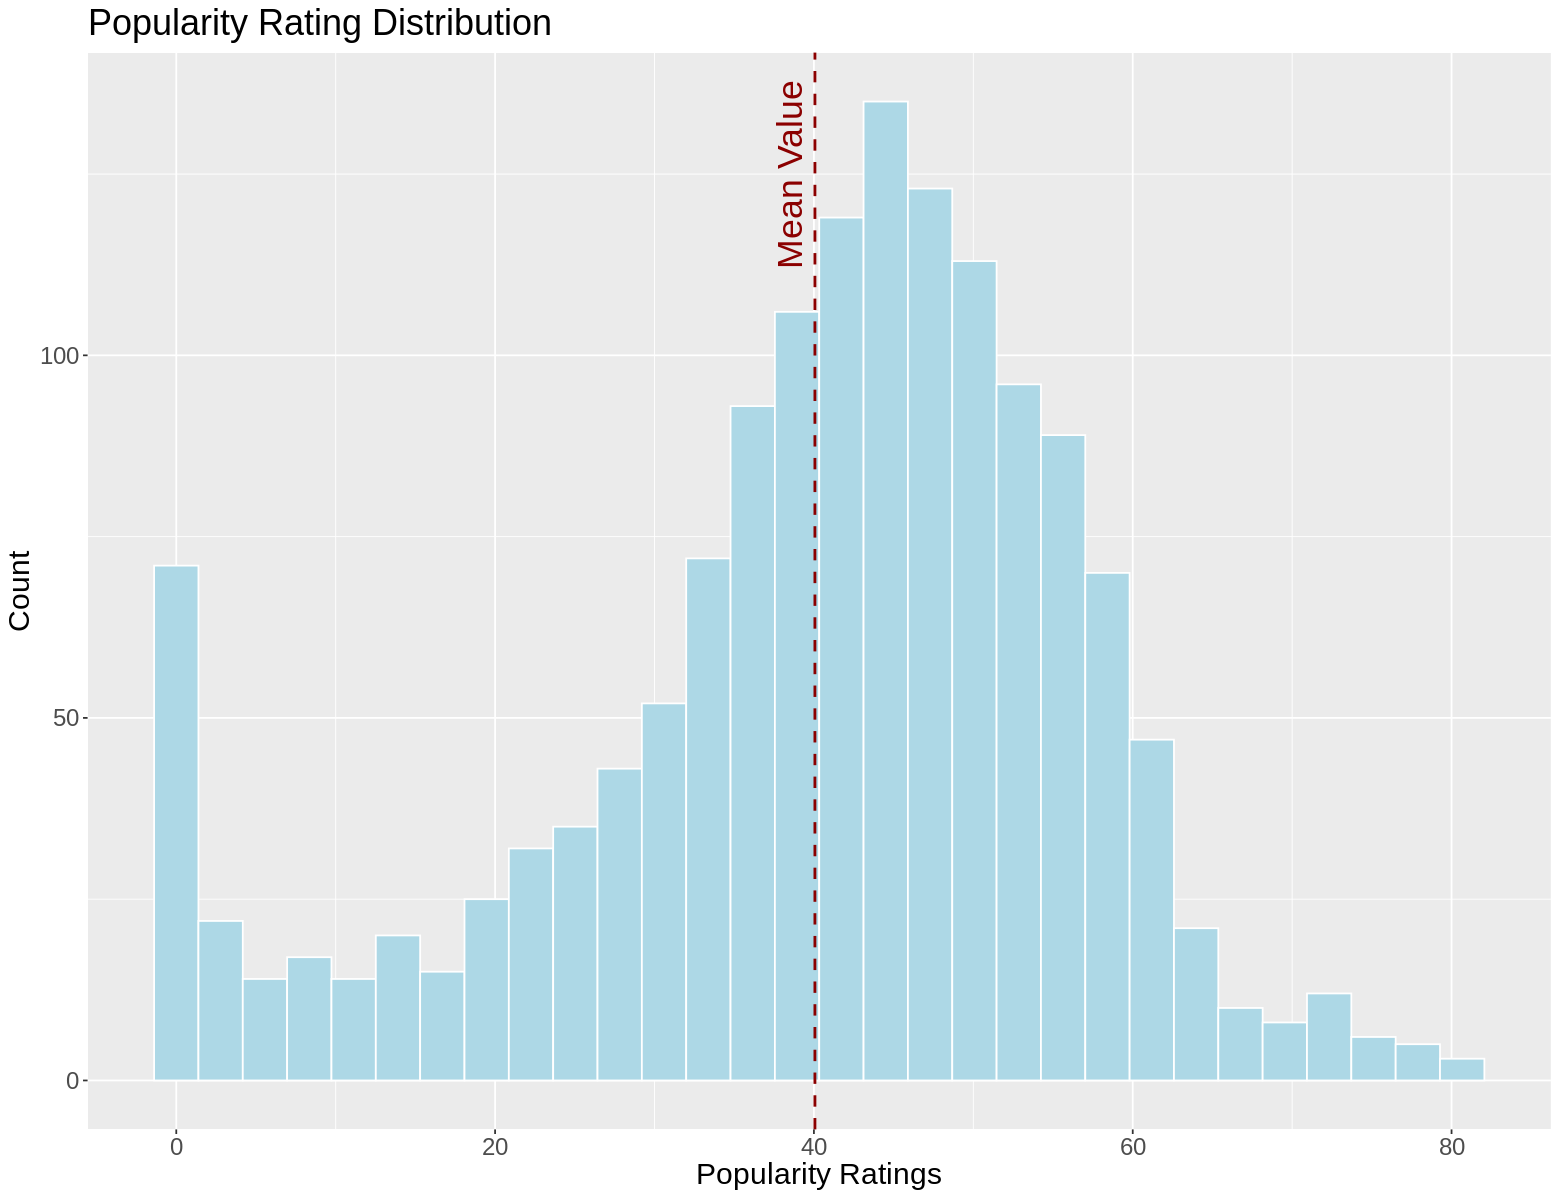

In [10]:
options(repr.plot.width = 13, repr.plot.height = 10)

pop_hist = popularity_training %>%
    ggplot(aes(x=popularity)) +
    geom_histogram(bins=30, colour="white", fill="lightblue") +
    labs(x="Popularity Ratings", y= "Count", title="Popularity Rating Distribution")+
    theme(text = element_text(size = 18)) +
    geom_vline(xintercept = 40.063, linetype = "dashed", size = 0.8, colour= "darkred") +
    annotate("text", x=38.5, y=125, label = "Mean Value", size=7.5, angle=90, colour="darkred")

pop_hist

#### Insights

If we analyze the **summary statistics table** in section 2.4.1 alongside the **popularity histogram** above, an interesting insight can be made: although the mean popularity is around the 40's, most songs actually fall close to the 50's bin.

This is because the histogram is **bimodal:** a peak at 0 as well as near the 50's. Many songs (surprisingly) have a popularity score of 0, which results in the mean popularity value being pulled away from the middle peak of the histogram towards a lower value.

This finding will be important in the future regarding popularity interpretation. For example, if we find a song with a popularity rating of 45, we may initially think it is "popular" because that score is higher than the mean and median (40.06 and 43.06 respectively); however, since the histogram is bimodal, those values may actually not be representative of the actual meaning of "popular", since the histogram is centered around the 50's if we disregard songs with 0 popularity scores.

We will also emphasize the `mean` and `sd` values of `popularity` as it will be crucial later to assess the effectiveness of our regression models.

### 3.3 Exploratory Visualizations
#### 3.3.1 Key Barchart by Count and Mode

In this dataset, the variable mode refers to the key (either major or minor) in which the song is written in. Because the keys (A-G) and tones (major/minor) of songs are indeed related to the melodic composition of a song, we are able to plot a bar chart to visualize the distribution of the keys (mode).

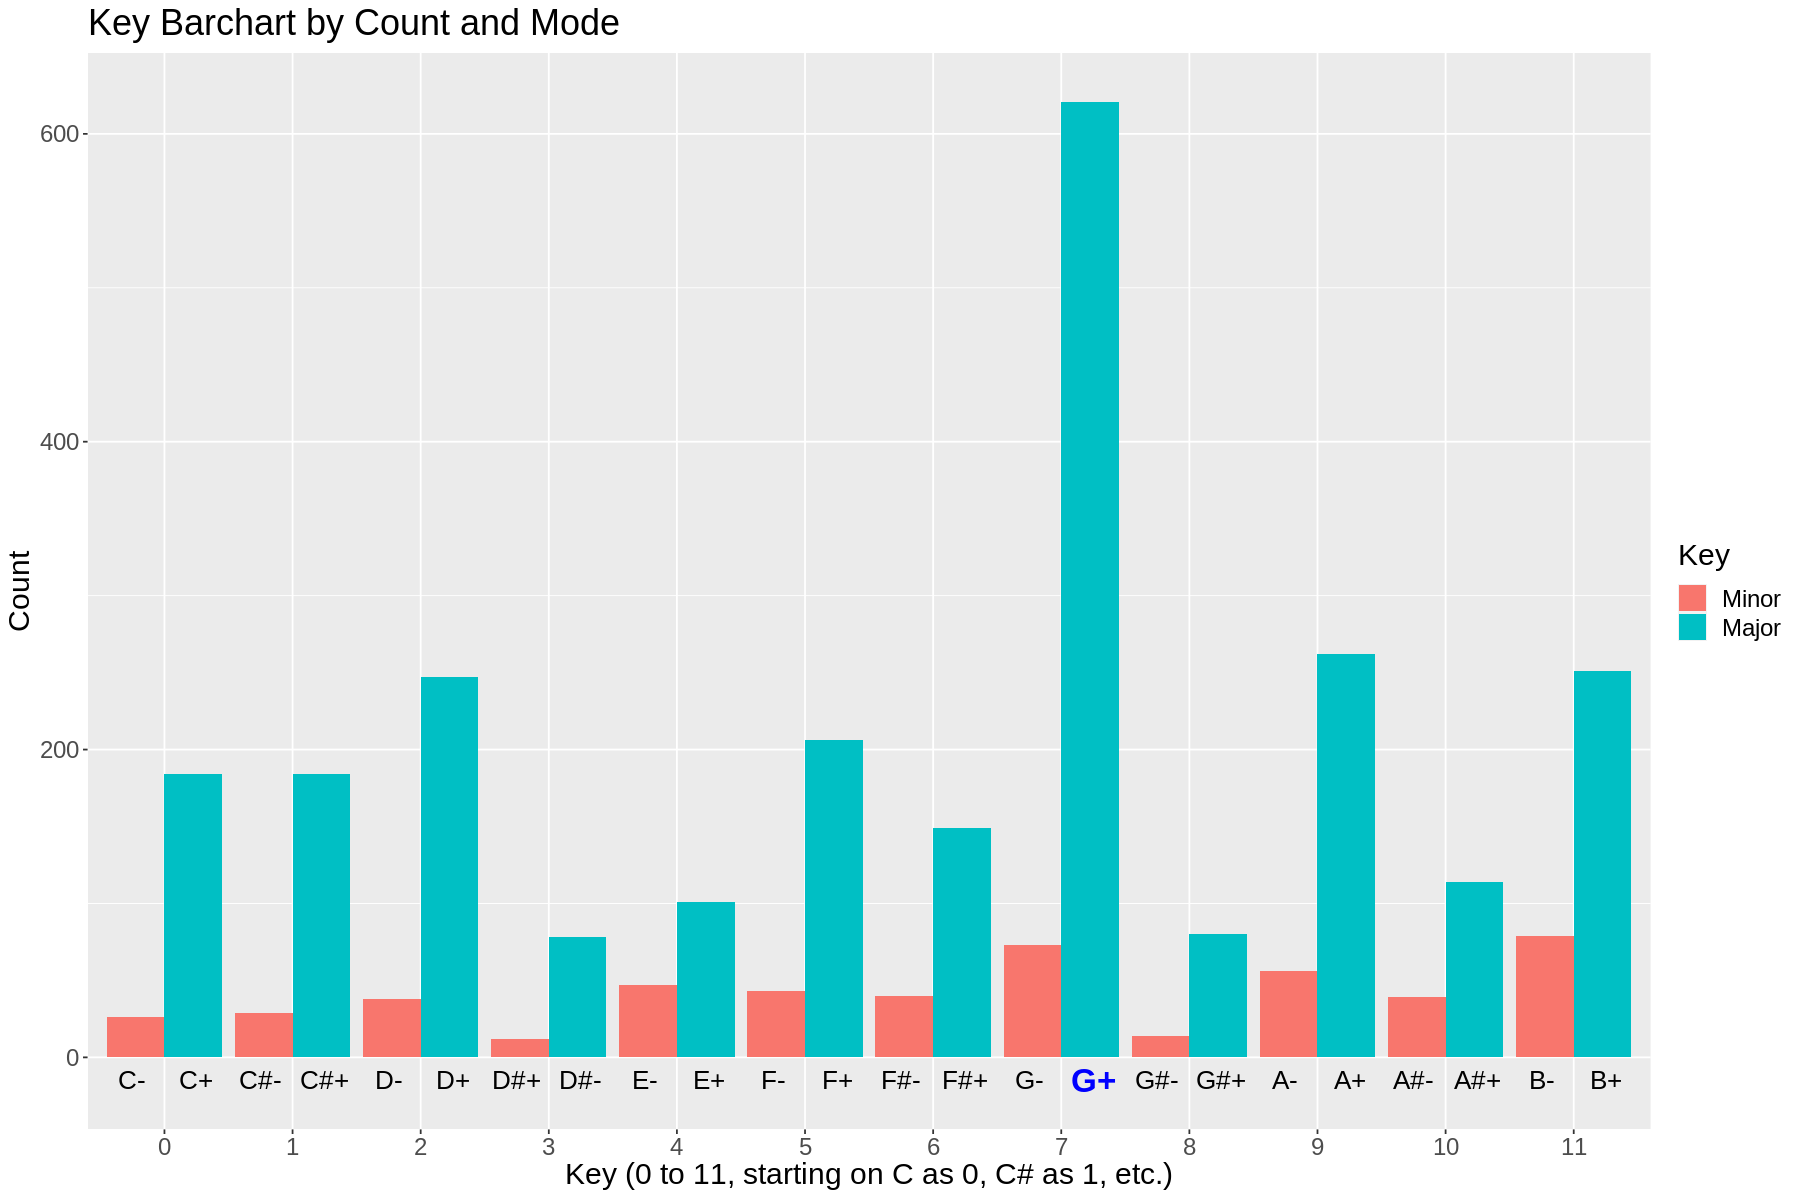

In [11]:
#Key Barchart by Count and Mode

options(repr.plot.width = 15, repr.plot.height = 10)

popularity_cat = popularity_data%>%
    select(mode,key)

key_mode_plot = ggplot(popularity_cat, aes(x=key, fill=mode))+
    geom_bar(position="dodge") + #The `fill` and position="dodge" functions allow us to distinguish the major and minor keyed song within the barchart.
    labs(
        x="Key (0 to 11, starting on C as 0, C# as 1, etc.)",
        y="Count", title="Key Barchart by Count and Mode") +
    scale_fill_discrete(name = "Key", labels = c("Minor", "Major")) +
    annotate("text", x=0.75, y=-15, label = "C-", size=5.5) +
    annotate("text", x=1.25, y=-15, label = "C+", size=5.5) +
    annotate("text", x=1.75, y=-15, label = "C#-", size=5.5) +
    annotate("text", x=2.25, y=-15, label = "C#+", size=5.5) +
    annotate("text", x=2.75, y=-15, label = "D-", size=5.5) +
    annotate("text", x=3.25, y=-15, label = "D+", size=5.5) +
    annotate("text", x=3.75, y=-15, label = "D#+", size=5.5) +
    annotate("text", x=4.25, y=-15, label = "D#-", size=5.5) +
    annotate("text", x=4.75, y=-15, label = "E-", size=5.5) +
    annotate("text", x=5.25, y=-15, label = "E+", size=5.5) +
    annotate("text", x=5.75, y=-15, label = "F-", size=5.5) +
    annotate("text", x=6.25, y=-15, label = "F+", size=5.5) +
    annotate("text", x=6.75, y=-15, label = "F#-", size=5.5) +
    annotate("text", x=7.25, y=-15, label = "F#+", size=5.5) +
    annotate("text", x=7.75, y=-15, label = "G-", size=5.5) +
    annotate("text", x=8.25, y=-15, label = 'bold("G+")', size=7, colour = "blue", parse = TRUE) +
    annotate("text", x=8.75, y=-15, label = "G#-", size=5.5) +
    annotate("text", x=9.25, y=-15, label = "G#+", size=5.5) +
    annotate("text", x=9.75, y=-15, label = "A-", size=5.5) +
    annotate("text", x=10.25, y=-15, label = "A+", size=5.5) +
    annotate("text", x=10.75, y=-15, label = "A#-", size=5.5) +
    annotate("text", x=11.25, y=-15, label = "A#+", size=5.5) +
    annotate("text", x=11.75, y=-15, label = "B-", size=5.5) +
    annotate("text", x=12.25, y=-15, label = "B+", size=5.5) +
    theme(text = element_text(size = 18))

key_mode_plot

#### Insights
From the visualization of this bar chart plot, we found that songs written in the key of G major are by far the most prominent. Furthermore, songs in major key tones greatly outnumber those in the minor key. This does not yet give us any insights on the popularity of songs but it is very relevant to the preliminary exploration of the dataset and the understanding of song characteristics.

#### 3.2.2 Quantitative Variables vs. Popularity Scatterplots

As outlined in the introduction, the goal of this research is to evaluate whether we can predict song popularity (a quantitative metric) based on song features (also quantitative metrics). Therefore, these variables are the basis upon which the remainder of this project is built and the models are created. 

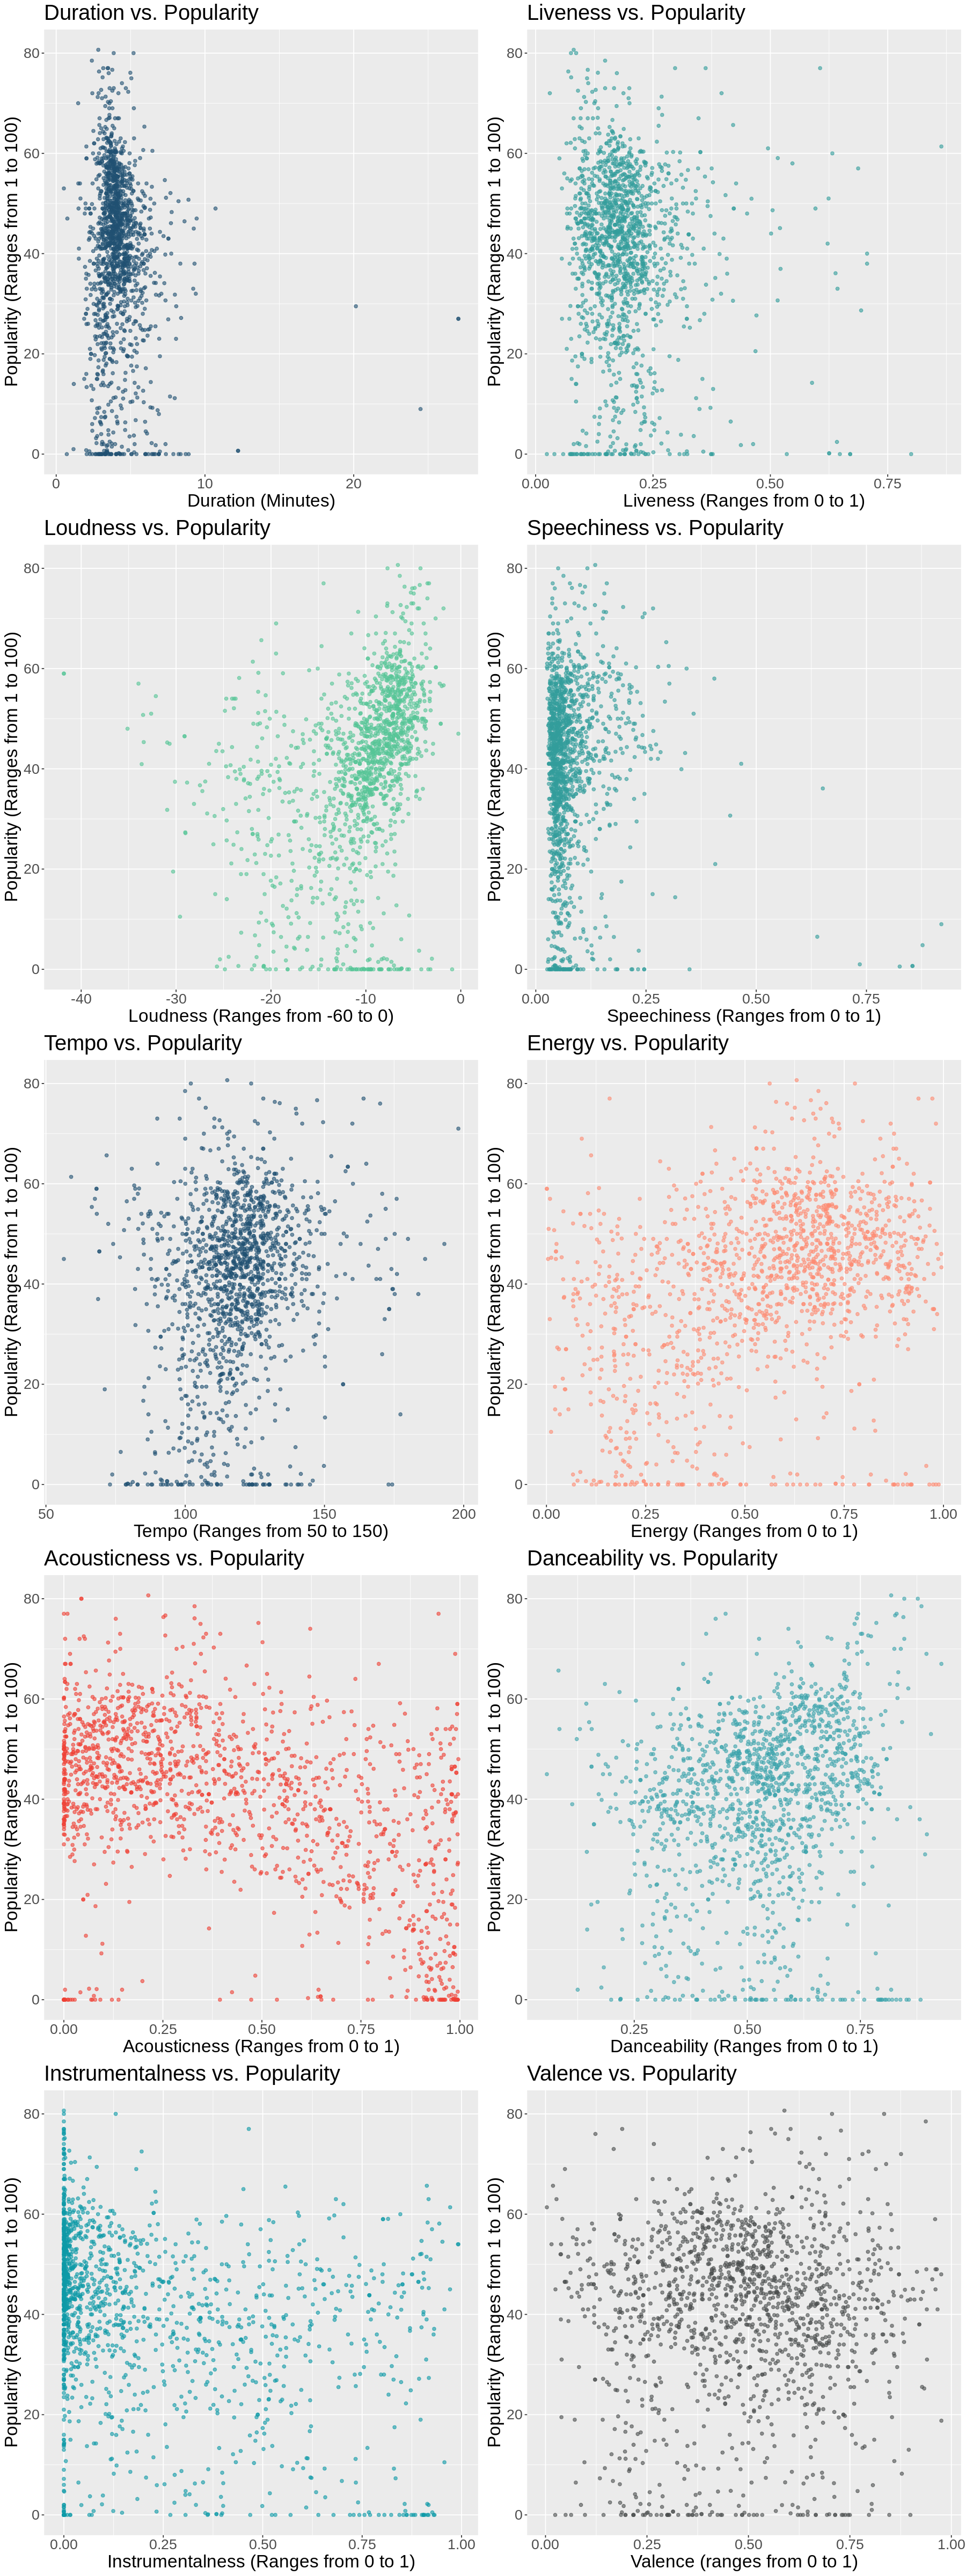

In [12]:
#To visualize the relationship between each variable and the target variable, popularity, we created scatterplots for each pairing.

options(repr.plot.width=10, repr.plot.height=8)

duration_plot = ggplot(popularity_num2, aes(x = duration_min, y = popularity)) +
    geom_point(alpha=0.6, colour="#205072") +
    labs(
        x="Duration (Minutes)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Duration vs. Popularity"
        ) + theme(text = element_text(size = 20))

liveness_plot = ggplot(popularity_num2, aes(x = liveness, y = popularity)) +
    geom_point(alpha=0.6, colour="#329D9C") +
    labs(
        x="Liveness (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Liveness vs. Popularity"
        ) + theme(text = element_text(size = 20))

loudness_plot = ggplot(popularity_num2, aes(x = loudness, y = popularity)) +
    geom_point(alpha=0.6, colour="#56C596") +
    labs(
        x="Loudness (Ranges from -60 to 0)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Loudness vs. Popularity"
        ) + theme(text = element_text(size = 20))

speechiness_plot = ggplot(popularity_num2, aes(x = speechiness, y = popularity)) +
    geom_point(alpha=0.6, colour="#329D9C") +
    labs(
        x="Speechiness (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Speechiness vs. Popularity"
        ) + theme(text = element_text(size = 20))

tempo_plot = ggplot(popularity_num2, aes(x = tempo, y = popularity)) +
    geom_point(alpha=0.6, colour="#205072") +
    labs(
        x="Tempo (Ranges from 50 to 150)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Tempo vs. Popularity"
        ) + theme(text = element_text(size = 20))

energy_plot = ggplot(popularity_num2, aes(x = energy, y = popularity)) +
    geom_point(alpha=0.6, colour="#fe8a71") +
    labs(
        x="Energy (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Energy vs. Popularity"
        ) + theme(text = element_text(size = 20))

acousticness_plot = ggplot(popularity_num2, aes(x = acousticness, y = popularity)) +
    geom_point(alpha=0.6, colour="#ee4035") +
    labs(
        x="Acousticness (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Acousticness vs. Popularity"
        ) + theme(text = element_text(size = 20))

danceability_plot = ggplot(popularity_num2, aes(x = danceability, y = popularity)) +
    geom_point(alpha=0.6, colour="#3da4ab") +
    labs(
        x="Danceability (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Danceability vs. Popularity"
        ) + theme(text = element_text(size = 20))

instrumentalness_plot = ggplot(popularity_num2, aes(x = instrumentalness, y = popularity)) +
    geom_point(alpha=0.6, colour="#0e9aa7") +
    labs(
        x="Instrumentalness (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Instrumentalness vs. Popularity"
        ) + theme(text = element_text(size = 20))

valence_plot = ggplot(popularity_num2, aes(x = valence, y = popularity)) +
    geom_point(alpha=0.6, colour="#4a4e4d") +
    labs(
        x="Valence (ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Valence vs. Popularity"
        ) + theme(text = element_text(size = 20))

options(repr.plot.width = 15, repr.plot.height = 40)
plot_grid(duration_plot, liveness_plot, loudness_plot, speechiness_plot, tempo_plot, energy_plot,
          acousticness_plot, danceability_plot, instrumentalness_plot, valence_plot, ncol = 2)

#plot_grid used to allow visualizations be viewed in two's; more condensed.

#### 3.3 Ggpairs Multivariate Analysis

To screen for key variables, each quantitative variable is passed through a multivariate analysis plot from `ggpairs` against popularity. This method allows us to compare the correlation coefficients -- determining the relevance of each variable.


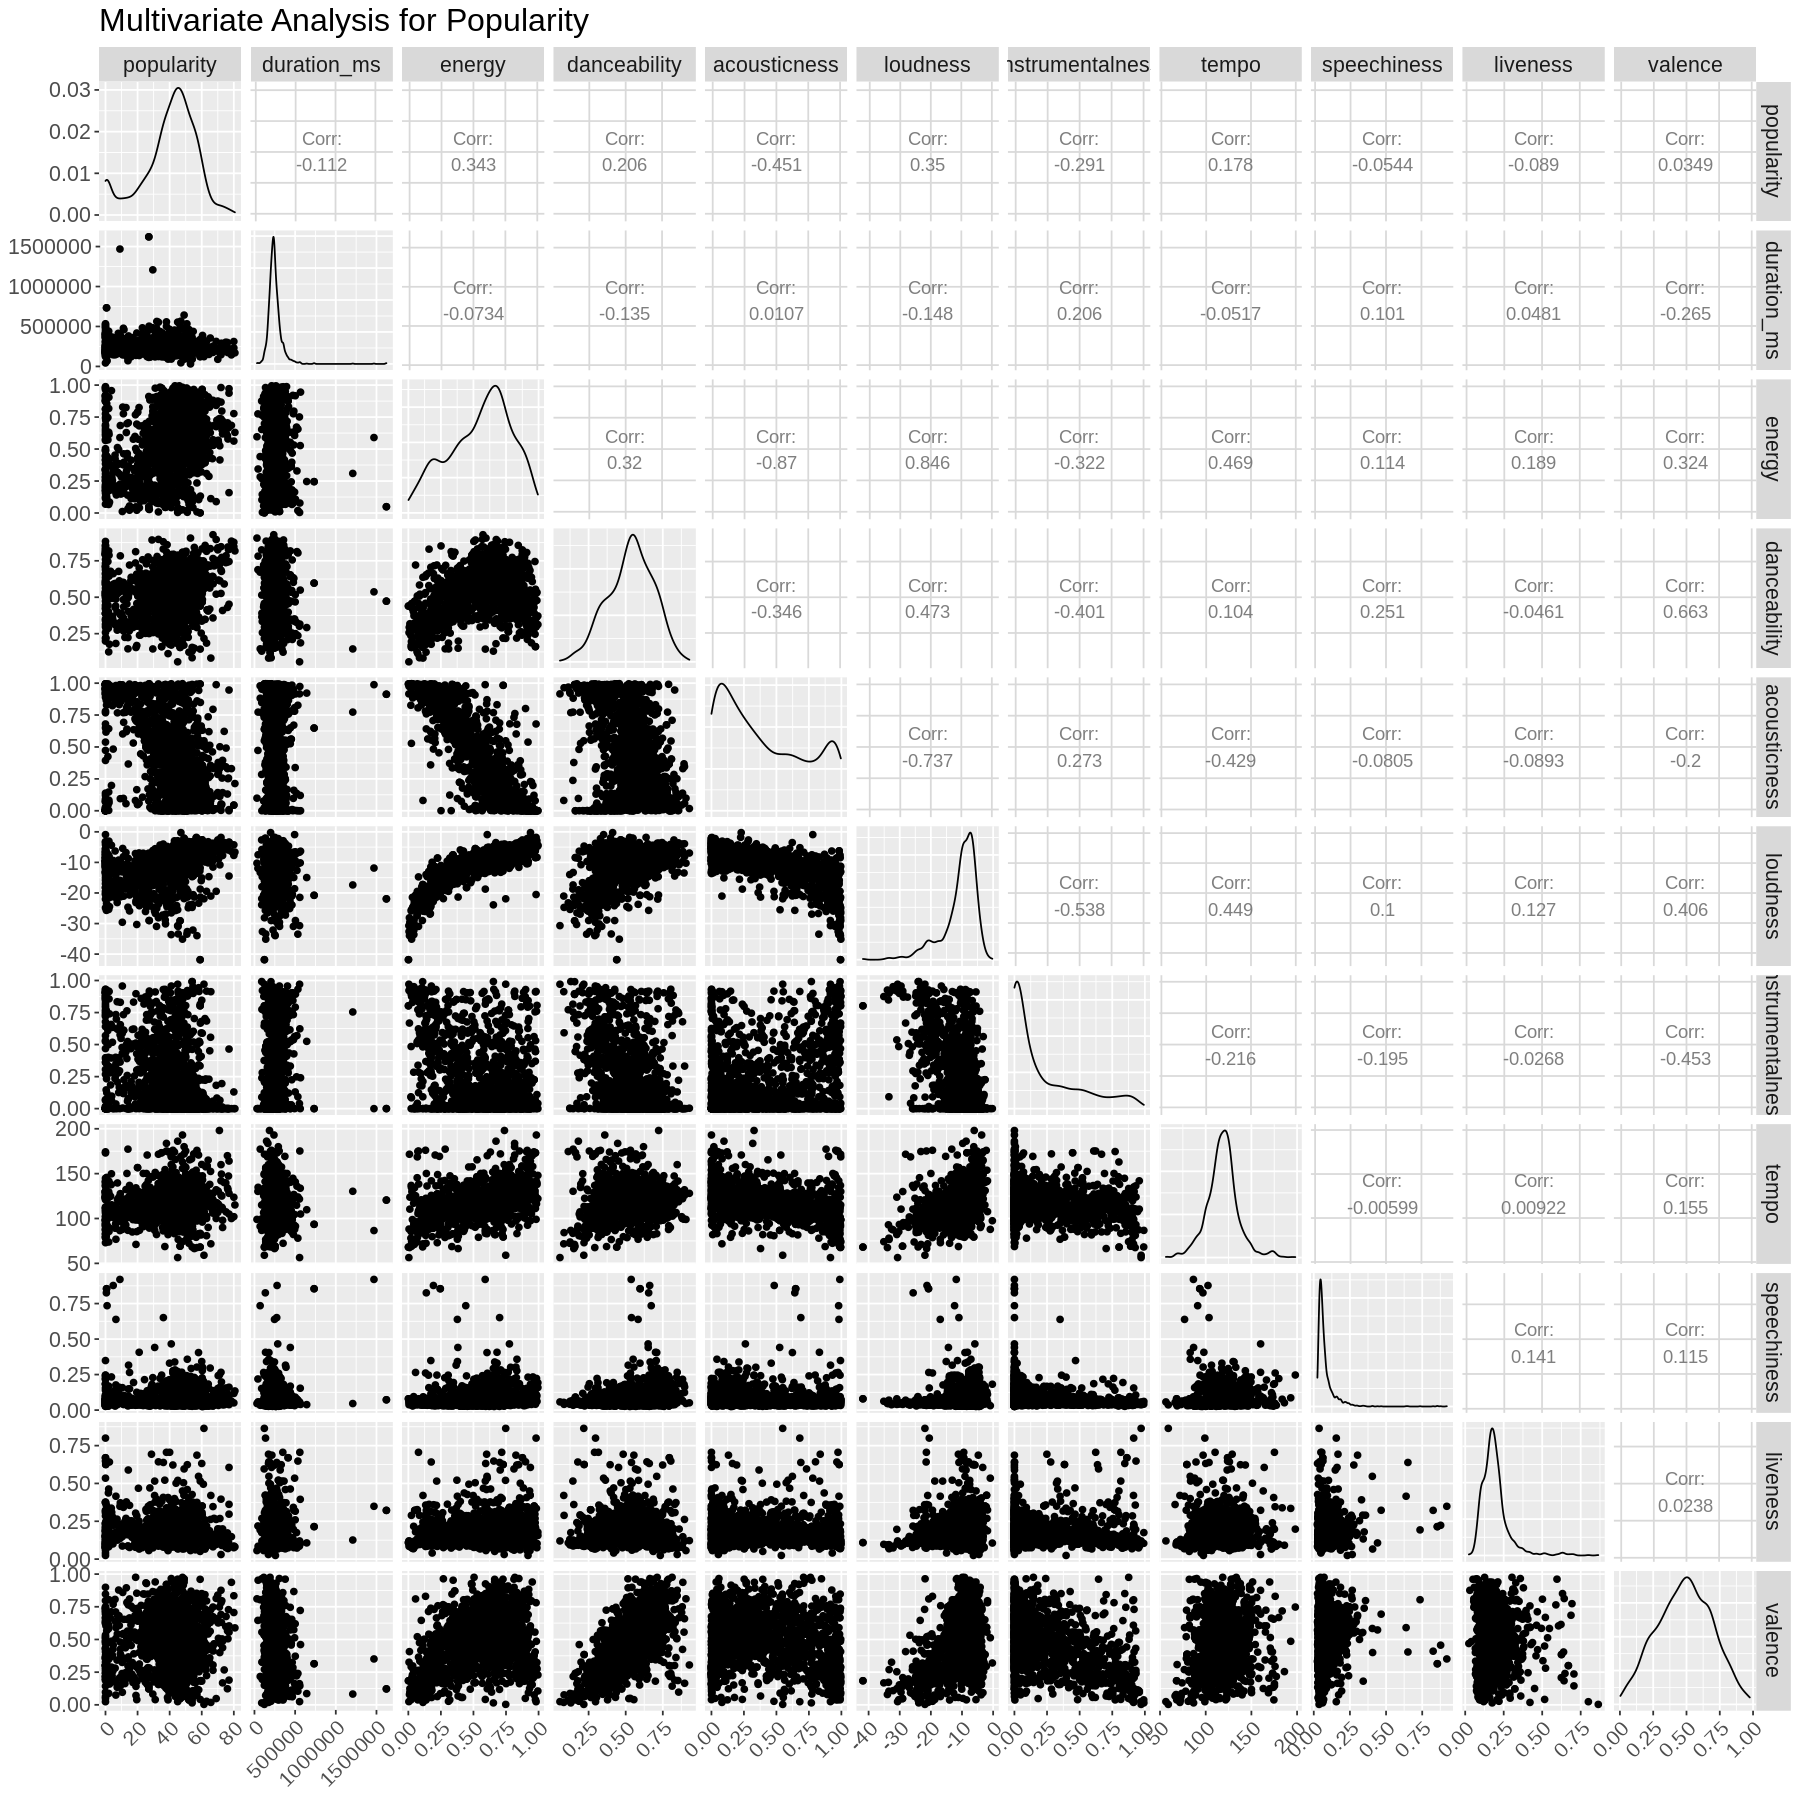

In [13]:
options(repr.plot.width = 15, repr.plot.height = 15)

#GGpairs Plot
pair_plot = popularity_training %>%
    select(popularity, duration_ms, energy, danceability, acousticness, loudness, instrumentalness, tempo, speechiness,liveness, valence) %>%
    ggpairs() + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
    theme(text = element_text(size = 16)) + 
    ggtitle("Multivariate Analysis for Popularity")

pair_plot

### Insights
From the `ggpairs` analysis, we can identify that `energy`, `acousticness`, and `loudness` have the highest correlation to popularity (r = 0.343, -0.451, 0.35, respectively). For this reason, we use these variables as the predictors for the remainder of the research. Furthermore, we plan to implement multiple trials of 5-fold cross-validation while tuning the neighbours in the final analysis to assess other variables' potential impact on a song’s popularity.
It is also important to note that while `energy` and `loudness` are positively correlated to `popularity`, `acousticness` is negatively correlated.


#### Insights
After visualizing the results of the linear model, it becomes more clear why the linear model had a worse fit than the KNN model: the plot points do not exhibit a particularly linear relationship.

Acknowledging exploratory analysis and ggpairs, a linear regression model would be the most appropriate to predict the quantitative variable `popularity` since our decision of the variables were heavily influenced by the correlation coefficients (“r”) which are associated with linear models. 
However, for the purpose of this report, this analysis will attempt both KNN and simple linear regression and contrast the strengths and results of both. 

The reason for also attempting a KNN regression is that upon analyzing the rather low coefficients of the variables, the group can not dismiss the possibility that the relation is non-linear. Likewise, comparing the results of both models would be an excellent way to fully test for the nature of the relationship.

Finally, no variables will be scaled for either model as the variables were all originally surveyed on a comparable scale. This choice will also streamline the results between the two tests and produce units that are humanly interpretable and easily comparable with the summary statistics table in Section 2.4.1.

### 4.1 KNN Regression Model
 
#### 4.1.1 Building and Tuning the Model

Since we identified `energy`, `acousticness`, and `loudness` as the variables with the highest correlation to popularity, we chose those three variables as the predictor variables when building the model. 

In [14]:
set.seed(4002)

popularity_recipe = recipe(popularity ~ energy + acousticness + loudness, data = popularity_training)

pop_spec = nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%  #we use `set_engine("kknn")` in the model specification to specify a KNN model
    set_mode("regression")  #we use `set_mode("regression")` in the model specification to denote a regression problem.
                            #It tells R that we need to use RMSPE instead of accuracy to tune and evaluate our model.

#In the steps coded and annotated below, we defined the recipe, for preprocessing our data; the model specification for the regression; a 5-fold cross-validation object; and merged them in a workflow. 

pop_vfold = vfold_cv(popularity_training, v = 5, strata = popularity)

#Create a 5-fold cross validation object, and put the recipe and model specification together in a workflow.

pop_wkflw = workflow() %>%
    add_recipe(popularity_recipe) %>%
    add_model(pop_spec)

pop_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Next, we performed cross-validation to identify the optimal K value for the model.

In [15]:
set.seed(4002)
gridvals = tibble(neighbors = seq(1,40)) #Run cross validation for a grid of numbers of neighbours ranging from 1 to 40.
                                         #We used a reasonable range of 1-40 for K and ran the cross-validation, collecting the metrics for `rmse`

pop_results = pop_wkflw %>%
    tune_grid(resamples = pop_vfold, grid = gridvals) %>%
    collect_metrics()%>%
    filter(.metric=="rmse")

head(pop_results)
tail(pop_results) #Returns rmse value of each neighbor.

neighbors .metric .estimator mean     n std_err   .config
1 1         rmse    standard   16.71677 5 0.2916117 Model01
2 2         rmse    standard   15.01051 5 0.1535790 Model02
3 3         rmse    standard   14.38370 5 0.2579857 Model03
4 4         rmse    standard   14.08783 5 0.2929784 Model04
5 5         rmse    standard   13.92533 5 0.2784241 Model05
6 6         rmse    standard   13.74752 5 0.2494712 Model06

neighbors .metric .estimator mean     n std_err   .config
1 35        rmse    standard   13.24002 5 0.2169831 Model35
2 36        rmse    standard   13.25027 5 0.2141202 Model36
3 37        rmse    standard   13.24909 5 0.2169851 Model37
4 38        rmse    standard   13.25130 5 0.2213946 Model38
5 39        rmse    standard   13.27002 5 0.2239406 Model39
6 40        rmse    standard   13.27994 5 0.2201441 Model40

#### 4.1.2 Number of Neighbours Visualization

To find the number of neighbors with the lowest RMSE, we create a scatterplot connected by a line to visualize the results.

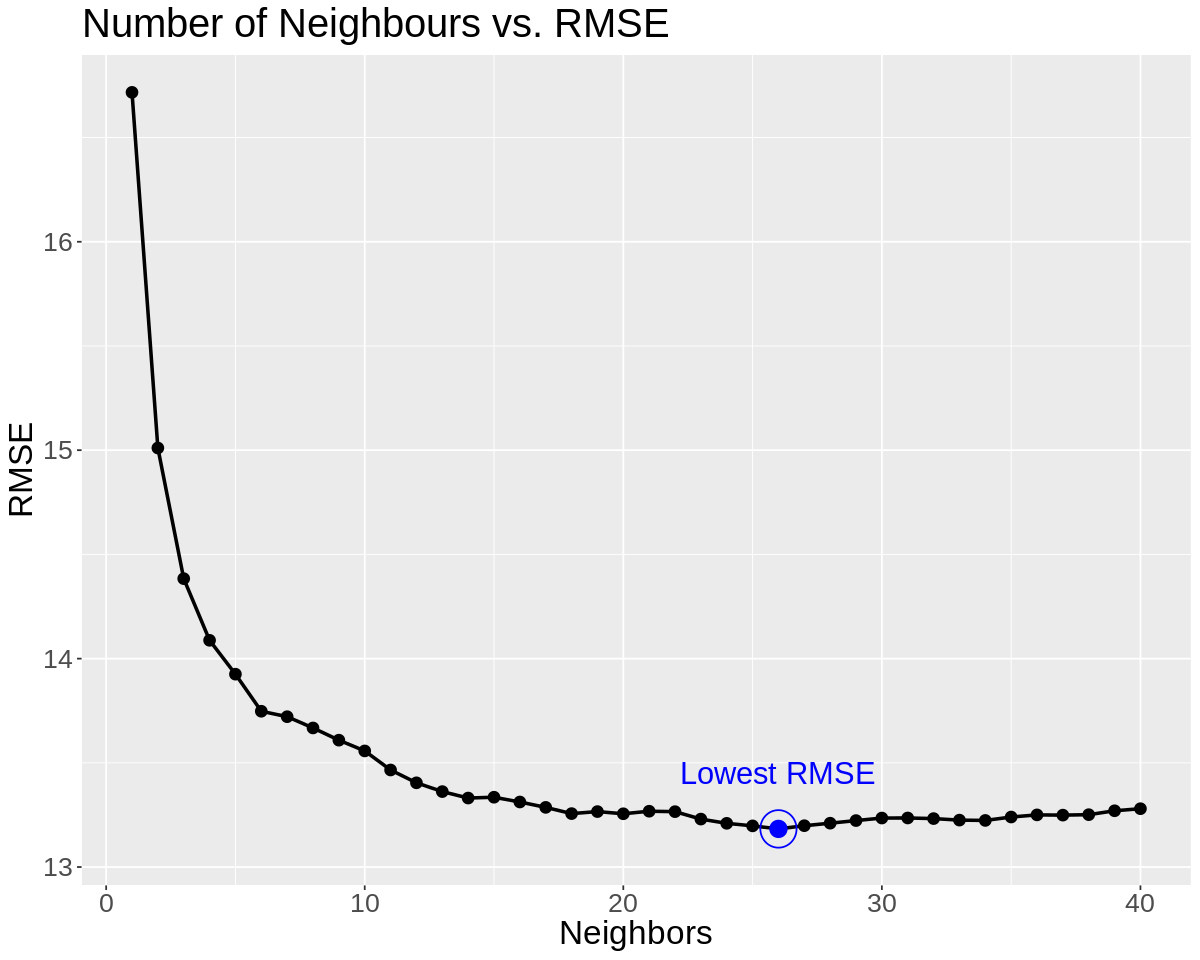

In [16]:
options(repr.plot.width = 10, repr.plot.height = 8)
bestk_graph = ggplot(pop_results, aes(x=neighbors, y=mean)) +
    geom_point(size=2.9)+
    geom_line(size=1)+
    labs(x= "Neighbors", y= "RMSE") +
    ggtitle("Number of Neighbours vs. RMSE") +
    theme(text = element_text(size = 20))+
    annotate("point",x=26, y=13.18306, colour="blue", size=4.5)+
    annotate("text", x=26, y=13.45, label = "Lowest RMSE", size=6.5, colour="blue")+
    annotate("path", 
                 x=26 + 0.7*cos(seq(0,2*pi,length.out=100)),
                 y=13.18306 + 0.09*sin(seq(0,2*pi,length.out=100)), colour="blue")

bestk_graph

In [17]:
pop_min = pop_results %>% 
    arrange(mean) %>%
    slice(1)
pop_min #Extract the row containing the minimum rmse value and optimal k-value.

neighbors .metric .estimator mean     n std_err  .config
1 26        rmse    standard   13.18306 5 0.245184 Model26

#### Insights
The smallest `rmse` occurs when K = 26. Therefore, we will use K = 26 when we fit the model to ensure the greatest accuracy. 

#### 4.1.3 Fitting the Model and Evaluating on the Test Set

In [18]:
set.seed(4002)

#

kmin = pop_min %>%
    pull(neighbors)

pop_spec = nearest_neighbor(weight_func = "rectangular", neighbors = kmin) %>% #Re-train our KNN regression model on the entire training data set, using 26 neighbours.
    set_engine("kknn") %>%
    set_mode("regression")

pop_fit = workflow() %>%
    add_recipe(popularity_recipe) %>%
    add_model(pop_spec) %>%
    fit(data = popularity_training)

pop_summary = pop_fit %>%
    predict(popularity_testing) %>% #Use `predict` to make predictions on the test data.
    bind_cols(popularity_testing) %>%
    metrics(truth = popularity, estimate = .pred) #Use the `metrics` function to compute the summary of regression quality.

pop_summary

.metric .estimator .estimate 
1 rmse    standard   13.4780754
2 rsq     standard    0.3580786
3 mae     standard    9.5295940

#### Insights
The `rmspe` for our KNN Regression model is 13.478. To put into perspective of how this number fairs, the `mean` for popularity is 40.063 and the `sd` is 16.712.
These numbers will be put into perspective using the summary statistics table later in the discussion section. 

#### 4.1.4 KNN Regression Visualization

In the visualizations below we plotted the results of our regression model in 3 plots. Each plot contains the respective predictor in the x-axis and popularity in the y-axis. The visualizations show how well our model predicts on the testing set and give us a visual understanding of the results (analyzed below). 

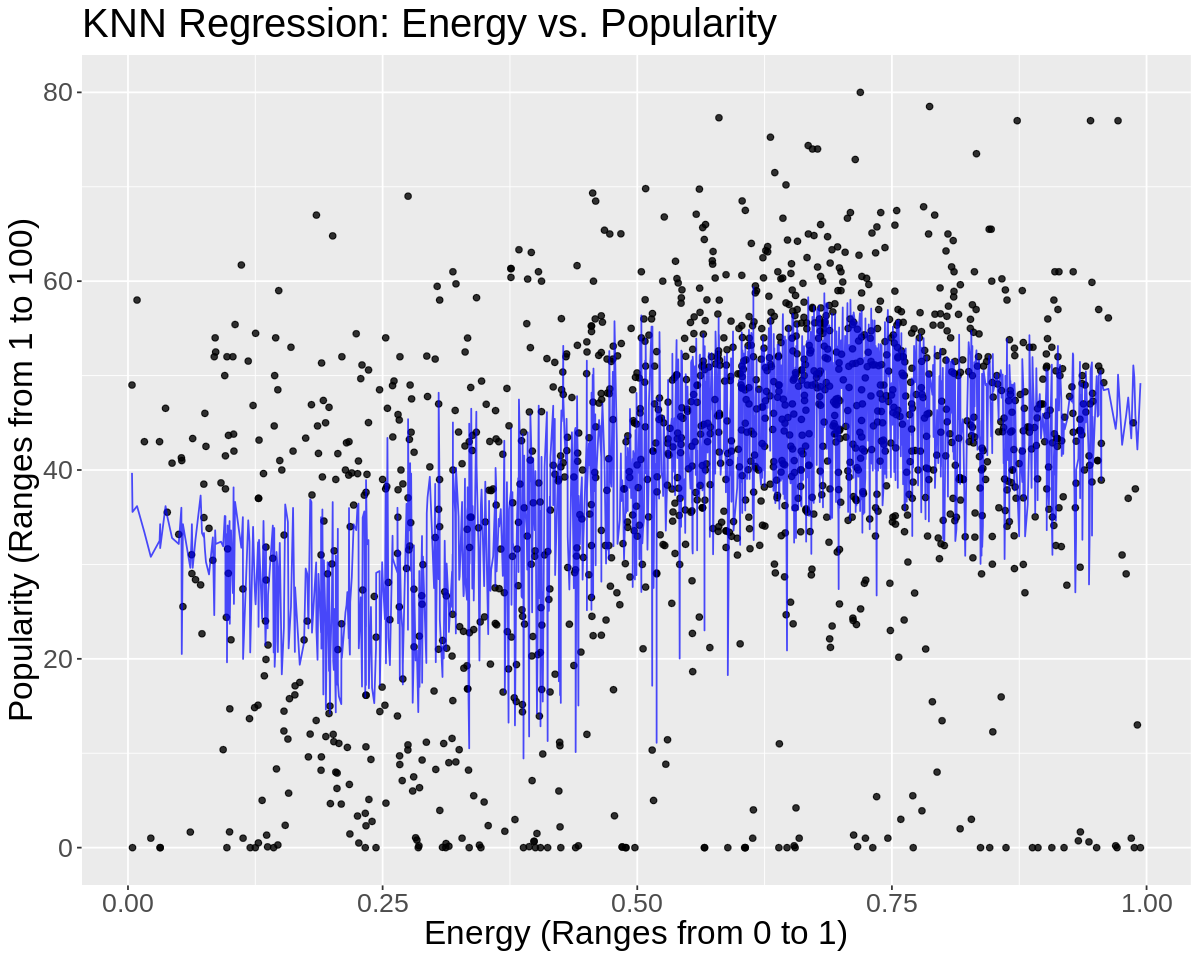

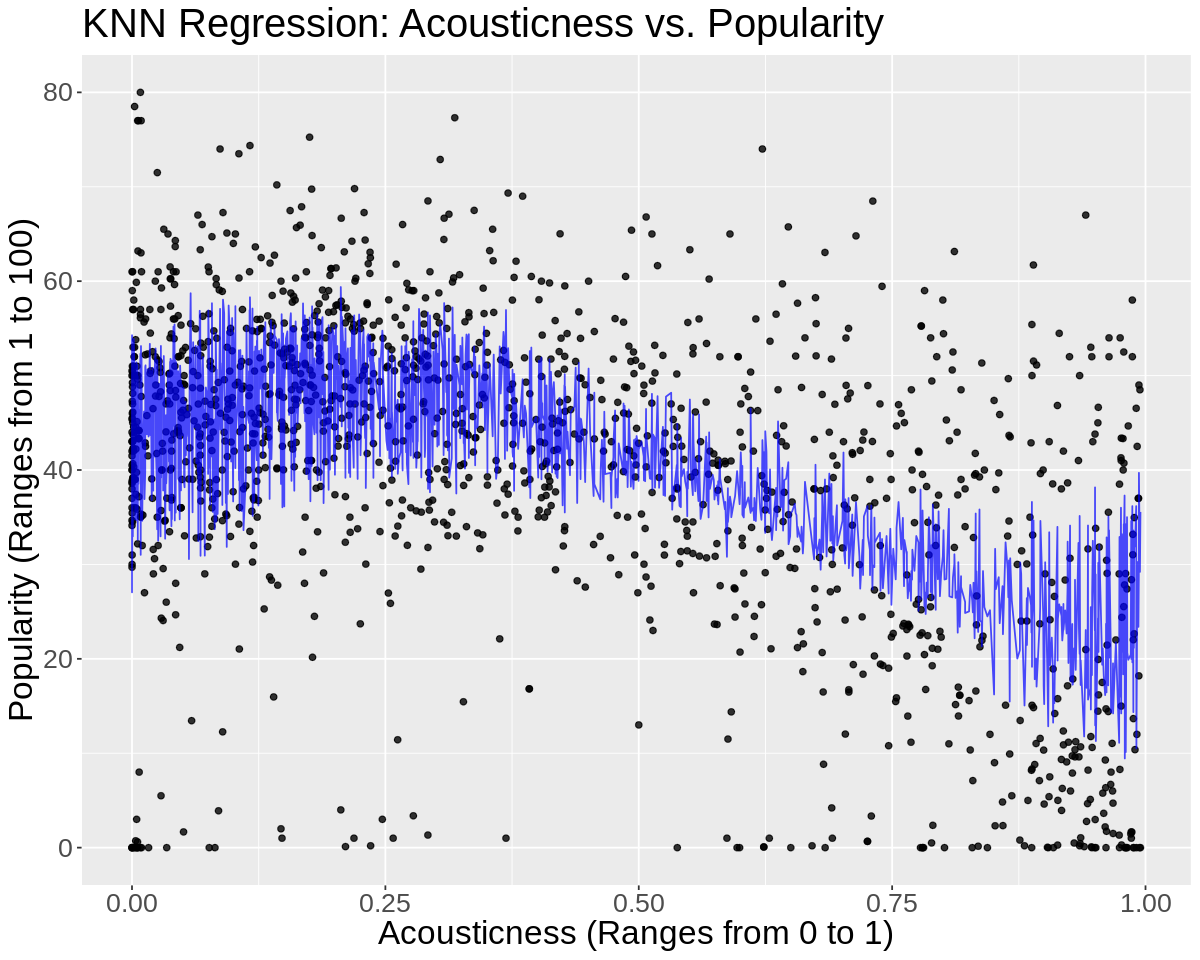

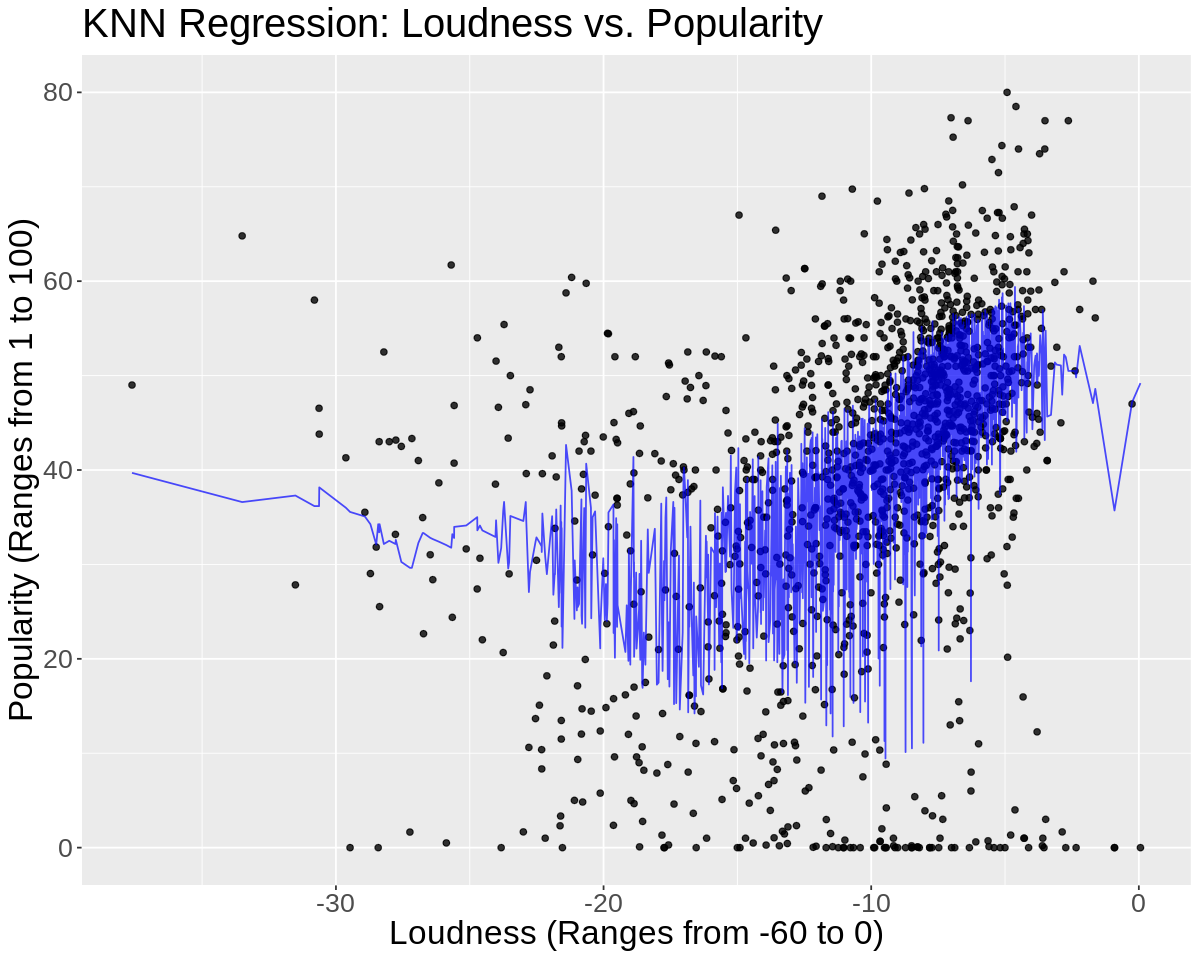

In [19]:
#Knn Regression Visualization
options(repr.plot.width = 10, repr.plot.height = 8)
pred_table <- pop_fit %>%
    predict(popularity_testing) %>%
    bind_cols(popularity_testing)

knn_energy_plot <- ggplot(pred_table, aes(x=energy, y=popularity)) +
    geom_point(alpha=0.8) +
    labs(
        x="Energy (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "KNN Regression: Energy vs. Popularity"
        ) +
    theme(text = element_text(size = 20)) +
    geom_line(data = pred_table, aes(x=energy, y=.pred), color = "blue", alpha=0.7)

knn_energy_plot

knn_acousticness_plot <- ggplot(pred_table, aes(x=acousticness, y=popularity)) +
    geom_point(alpha=0.8) +
    labs(
        x="Acousticness (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "KNN Regression: Acousticness vs. Popularity"
        ) + theme(text = element_text(size = 20)) +
    geom_line(data = pred_table, aes(x=acousticness, y=.pred), color = "blue", alpha=0.7)

knn_acousticness_plot

knn_loudness_plot <- ggplot(pred_table, aes(x=loudness, y=popularity)) +
    geom_point(alpha=0.8) +
   labs(
        x="Loudness (Ranges from -60 to 0)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "KNN Regression: Loudness vs. Popularity"
        ) + theme(text = element_text(size = 20)) +
    geom_line(data = pred_table, aes(x=loudness, y=.pred), color = "blue", alpha=0.7)

knn_loudness_plot
options(repr.plot.width = 25, repr.plot.height = 15)

#### Insights
In all 3 plots, there are signs of overplotting (high-amplitude wiggles of the KNN regression line) despite the K value being relatively high and having been tuned for the lowest `rmse` score.

### 4.2 Simple Linear Regression

#### 4.2.1 Building the Model
For this model, we continued to use the same predictors for ease of contrast and consistency.

In [20]:
set.seed(4002)
#Simple Linear Regression

lm_recipe = recipe(popularity ~ energy + acousticness + loudness, data = popularity_training)

lm_spec = linear_reg() %>%
    set_engine("lm") %>% #we use `set_engine("lm")` in the model specification to specify a linear model
    set_mode("regression")

lm_fit = workflow() %>%
    add_recipe(lm_recipe) %>%
    add_model(lm_spec) %>%
    fit(data=popularity_training) 

lm_fit

#find coefficients of best-fit line#

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)        energy  acousticness      loudness  
      74.560       -26.414       -32.394         0.625  


#### Simple Linear Regression Formula:

The coefficients outputted by the trained workflow allow us to derive the following simple linear regression formula:

$Popularity  = 74.560 -26.414*Energy  -32.394*Acousticness +0.625*Loudness$

#### 4.2.2 Calculating RMSE and RMSPE

Next, we ran our model and calculated the `rmse` and to evaluate the model's accuracy. 

In [21]:
#RMSE CALCULATION

lm_rmse = lm_fit %>%
    predict(popularity_training) %>%
    bind_cols(popularity_training) %>%
    metrics(truth = popularity, estimate = .pred) %>%
    filter(.metric == "rmse") %>%
    select(.estimate) %>%
    pull()

lm_rmse

#RMSPE CALCULATION

lm_rmspe = lm_fit %>%
     predict(popularity_testing) %>%
     bind_cols(popularity_testing) %>%
     metrics(truth = popularity, estimate = .pred)%>%
     filter(.metric == "rmse") %>%
     select(.estimate) %>%
     pull()

lm_rmspe

[1] 14.69914

[1] 14.57155

#### Insights
The results of the `rmse` and `rmspe` scores shown above indicate the similarity between both scores in the linear model. Because they are very similar in values, it proves that the model is almost equally as adept at predicting unknown values as it is at predicting the values it was trained with. This is further expanded on in the discussion section.

Another insight derives from the comparison of `rmspe` scores of **both** models. As a refresher, the KNN model produced a `rmspe` of 13.478, while the the linear model is 14.572. This means that on paper, the KNN model fits better than the linear model.


#### 4.2.4 Simple Linear Regression Visualization

In the visualizations below we plotted the results of our linear regression model in 3 plots. 

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



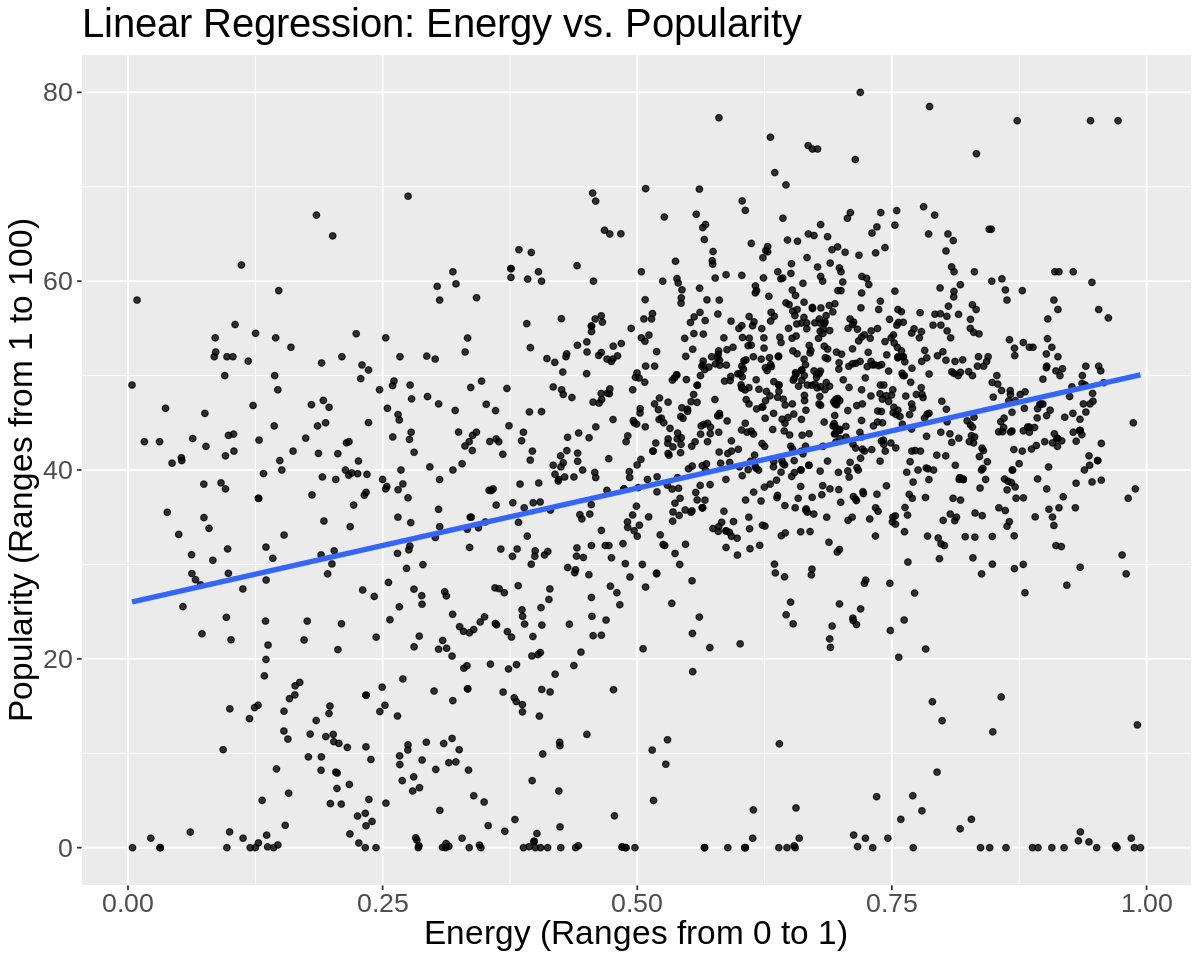

`geom_smooth()` using formula 'y ~ x'



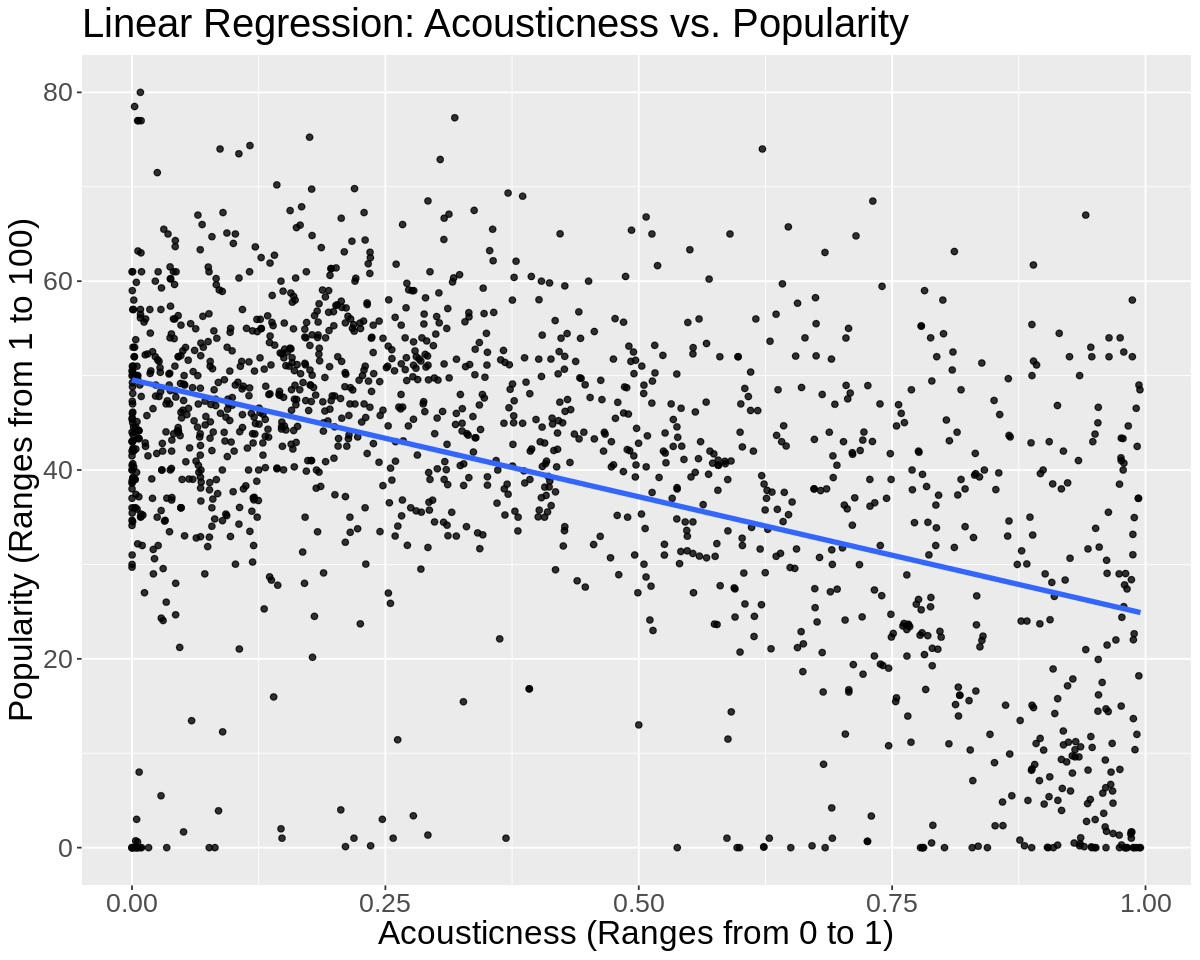

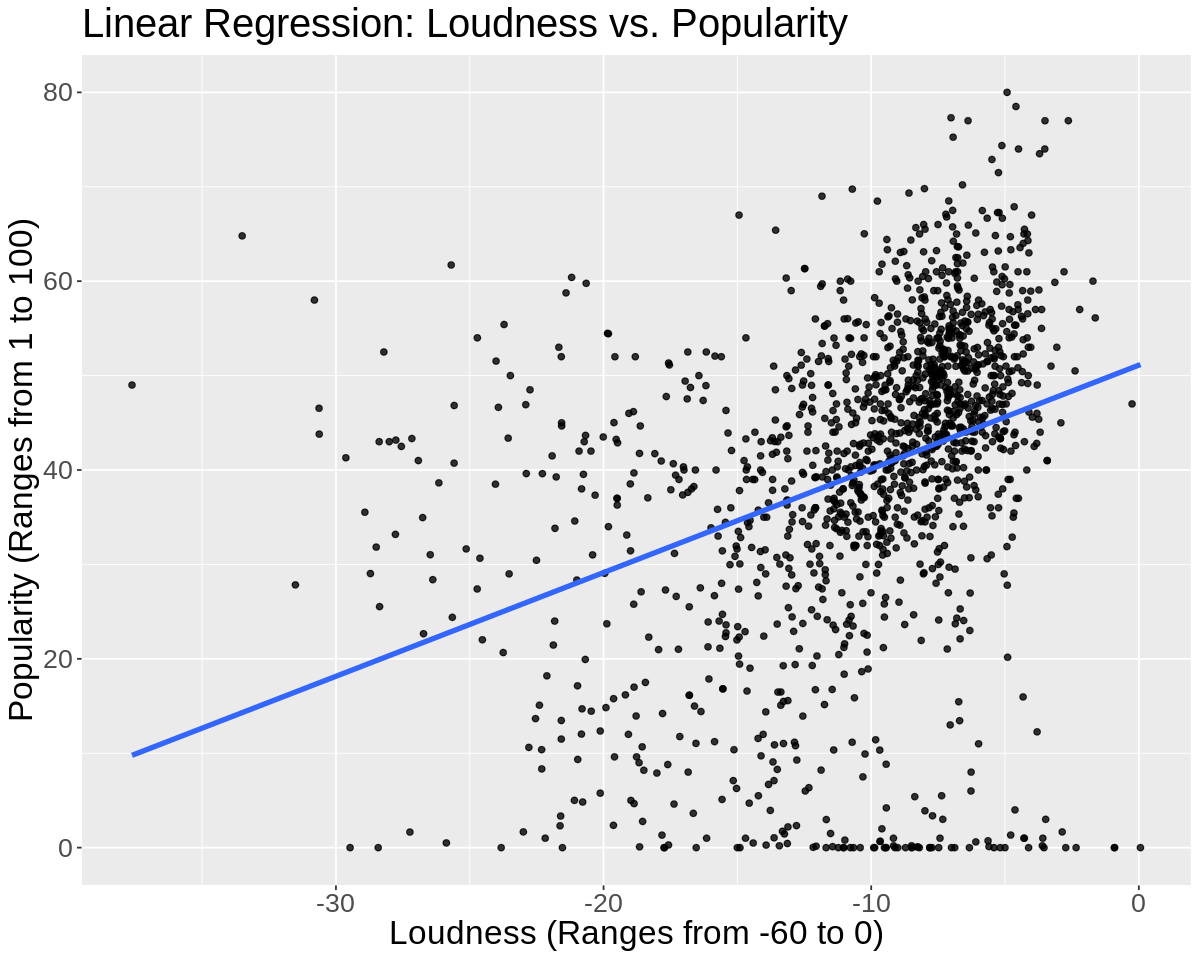

In [22]:
#Visualization for LM model
options(repr.plot.width = 10, repr.plot.height = 8)
lm_table = lm_fit%>%
    predict(popularity_testing) %>%
    bind_cols(popularity_testing)

lm_energy_plot = ggplot(lm_table, aes(x = energy, y = popularity)) +
    geom_point(alpha=0.8) +
    labs(
        x="Energy (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Linear Regression: Energy vs. Popularity "
        ) + theme(text = element_text(size = 20)) +
    geom_smooth(method = "lm", se = FALSE, size=1.5)

lm_energy_plot

lm_acousticness_plot = ggplot(lm_table, aes(x = acousticness, y = popularity)) +
    geom_point(alpha=0.8) +
    labs(
        x="Acousticness (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Linear Regression: Acousticness vs. Popularity"
        )  + theme(text = element_text(size = 20)) +
    geom_smooth(method = "lm", se = FALSE, size=1.5)

lm_acousticness_plot

lm_loudness_plot = ggplot(lm_table, aes(x = loudness, y = popularity)) +
    geom_point(alpha=0.8) +
    labs(
        x="Loudness (Ranges from -60 to 0)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Linear Regression: Loudness vs. Popularity"
        ) + theme(text = element_text(size = 20)) +
    geom_smooth(method = "lm", se = FALSE, size=1.5)

lm_loudness_plot

#### Insights

After visualizing the results of the linear model, it becomes more clear why the linear model had a worse fit than the KNN model: the plot points do not exhibit a particularly linear relationship and are therefore not well suited for a linear regression. 


### 4.3 Results Comparison

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



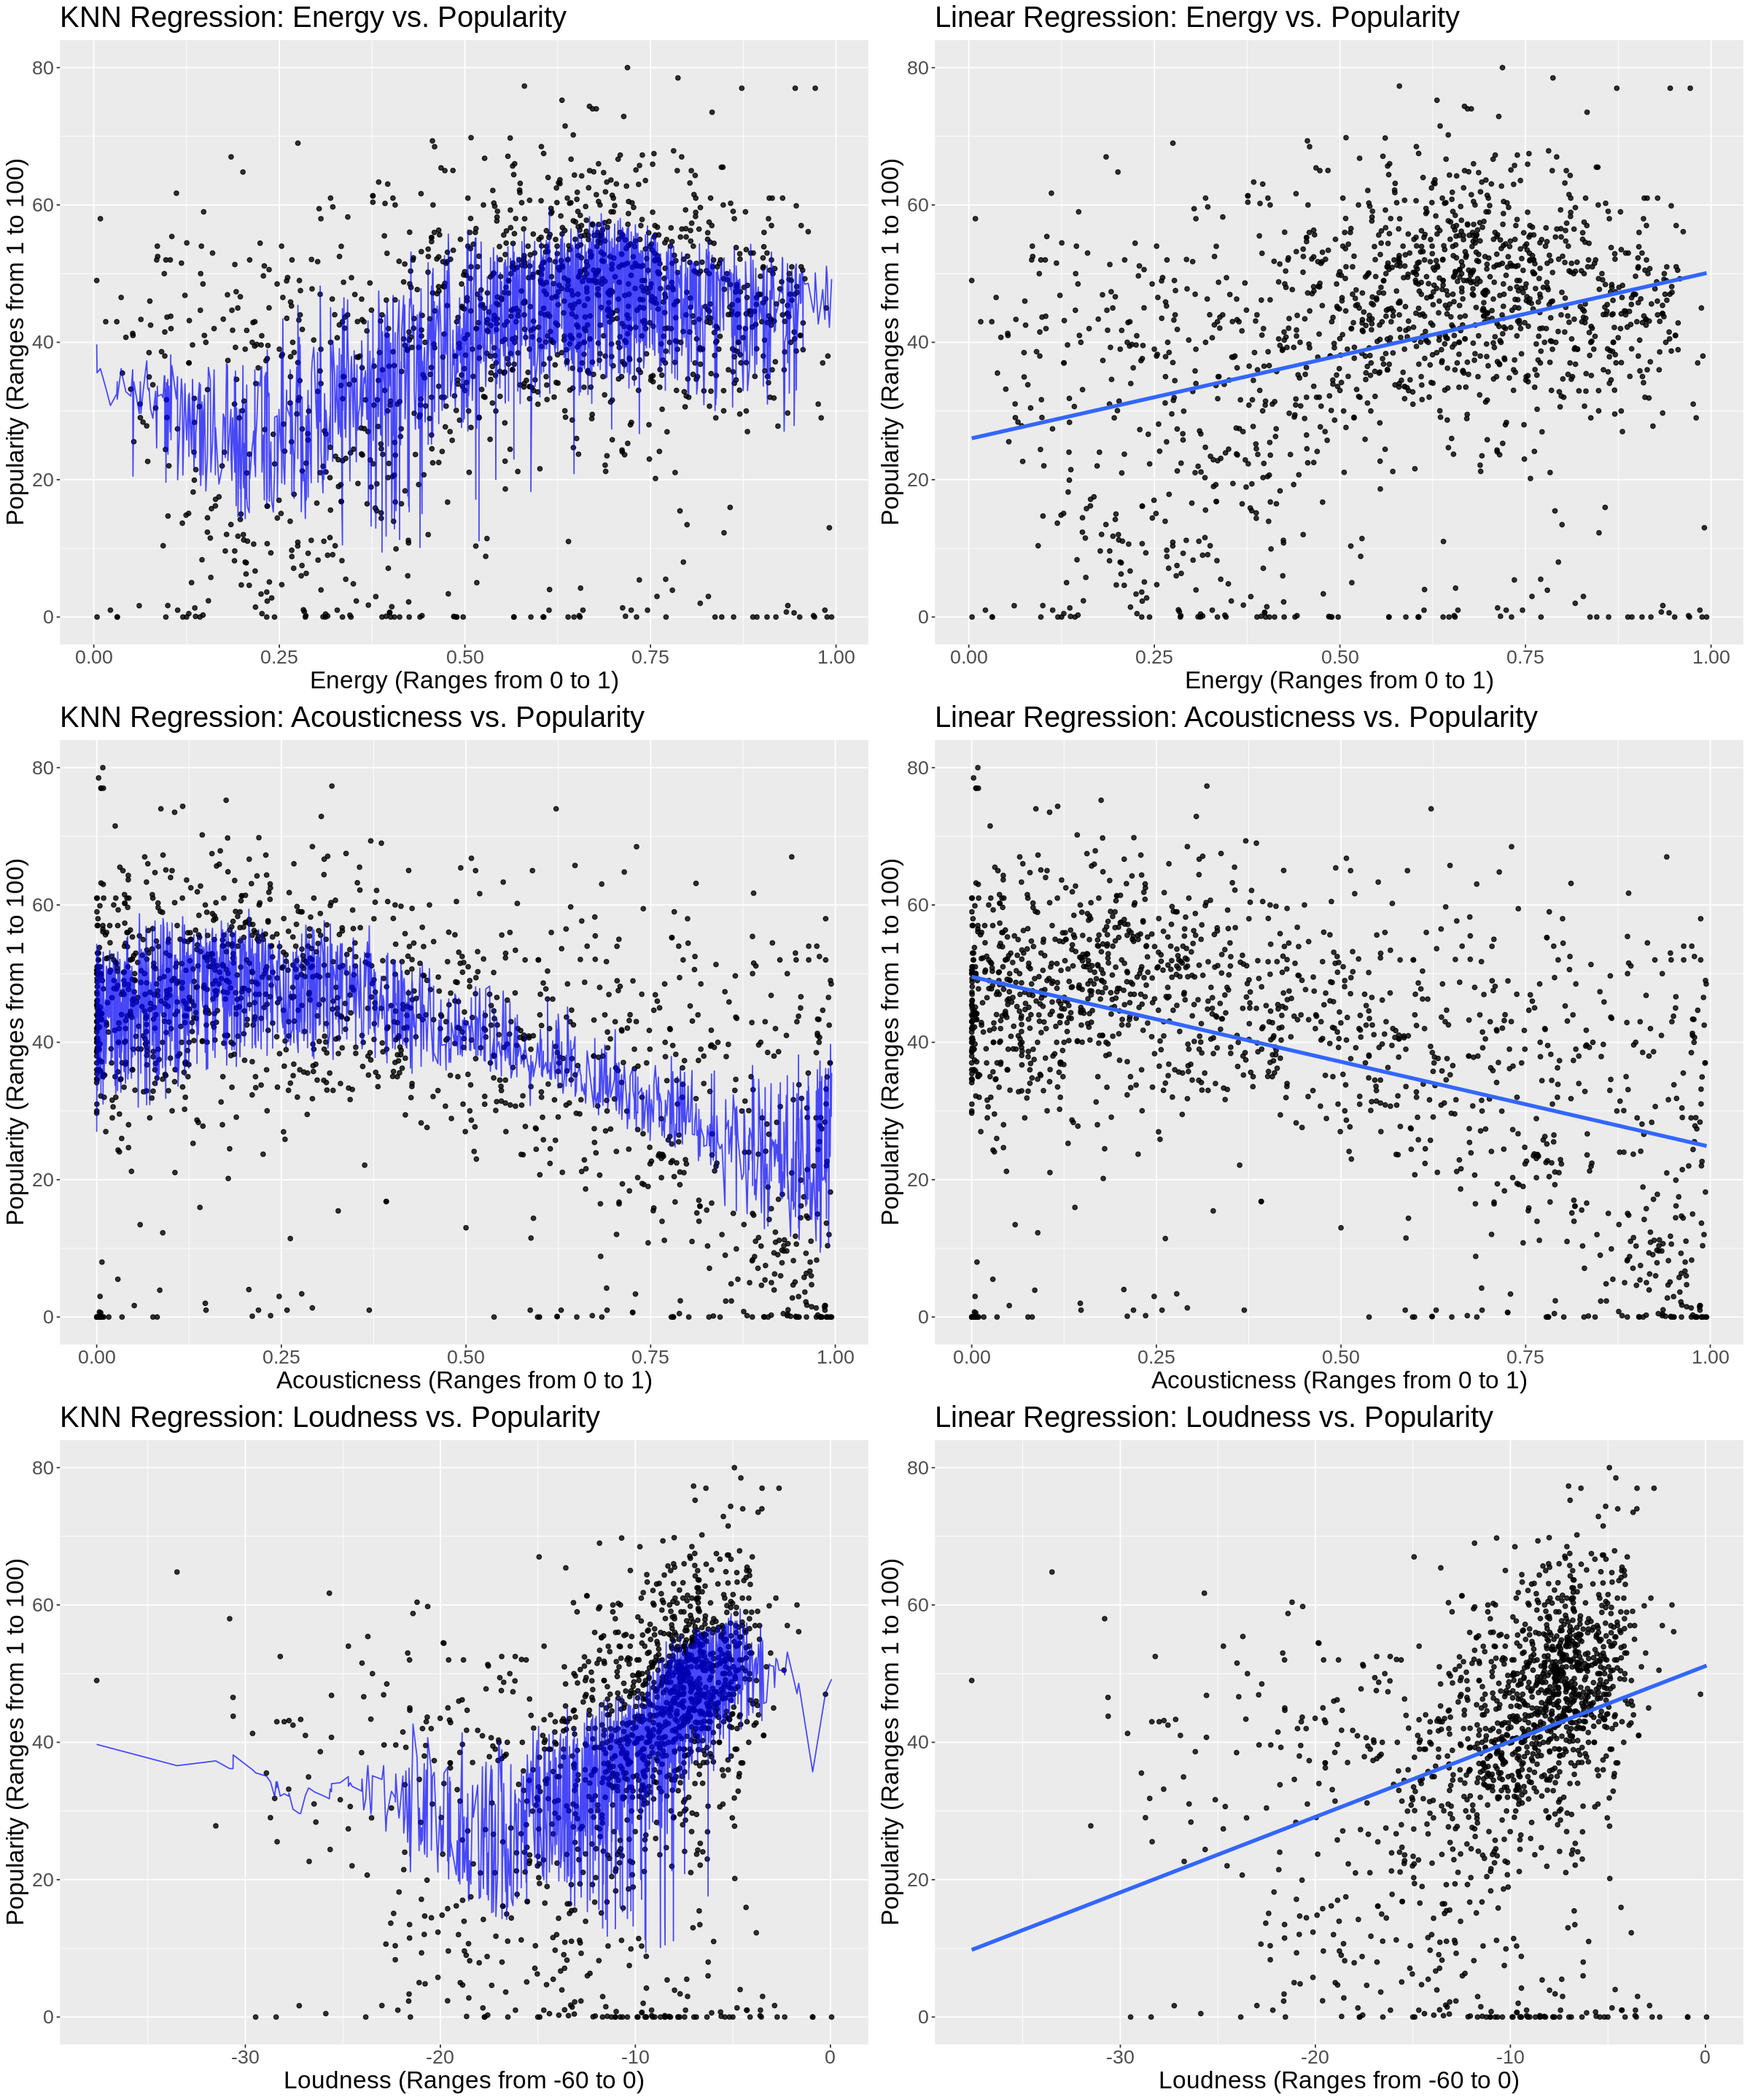

In [23]:
#KNN vs. Simple Linear Side-by-side
options(repr.plot.width = 20, repr.plot.height = 24)

#To better visualize the plots that demonstrate the testing for both models, we have used `plotgrid` to display them side-by-side. This allows for the results to be put into perspective before the reading of the conclusions. 
plot_grid(knn_energy_plot, lm_energy_plot, knn_acousticness_plot, lm_acousticness_plot, knn_loudness_plot, lm_loudness_plot, ncol=2)

KNN Regression Model `rmspe`: **13.478**

Linear Regression Model `rmspe`: **14.572**

## 5 Discussion & Conclusion

Going into this endeavour, we expected to find a moderate, if not strong relationship, between target and predictor variables since the distributions available on Kaggle showed promising plots and the preview exhibited a normal distribution. Our intuition also led us to this expectation. However, our analysis suggests otherwise. Considering the mean popularity score, 40.6, and the standard deviation, 16.7, (section 3.1), our `rmspe` from KNN regression, 13.5, (section 5.3) and from the linear regression,14.6, (section 6.1) suggest that there is scope for improvement in the accuracy of our model. Both values are significantly higher than we expected and are not accurate enough for us to conclude that there is a strong relationship between predictor and target variables.
The similar `rmse` and RMPSE scores in the linear regression model also indicate that the low `rmse` scores are not caused by a failure of the regression model since the accuracy of testing in the training and testing sets are very similar. Instead, this further supports our conclusion that there is no particularly strong relationship between predictor and target variables. 

Since the KNN regression has a lower RMSPE, it is more accurate than the linear regression model. This seems plausible because the variables did not exhibit a particularly linear relationship among them. Additionally, there is clear collinearity between energy, acousticness and loudness, which suggests the relationships between the variables to be within the predictor variables and not primarily with the target.

Future research could use another perspective to better predict song accuracy. An example of this is researching whether we can predict that a song will not be popular. Certain studies have already taken this approach (Mohamed, 2018) and future analysis can build on this research. New perspectives, could also use a classifier model (low, medium and high popularity) rather than using regression to qualitatively predict the popularity score.
Furthermore, in section 3.2, we observed a high number of songs with a popularity score of 0, while the rest of the histogram exhibited a normal distribution. We theorized this to be the reason why our KNN regression seems to be overfitting. For future research, we can filter out all songs with 0 popularity and see if that results in a stronger correlation. 

Future research could also include the addition of new, external factors unrelated to song characteristics, such as artist popularity, population demographics, and marketing since these factors can largely affect the popularity of a song. For example, we could investigate if the promotion of a song through advertisements, merchandise, or tours affects popularity. 

Including these factors in addition to the constituents of the song could lead to a more well-rounded analysis and we might expect to find stronger relationships between the target and predictor variables. Overall, while this research contributes to knowledge creation on song popularity prediction, there is still a very wide scope of research to be performed. 


### References

   Nasreldin, Mohamed. “Song Popularity Predictor.” Medium. Towards Data Science, May 14, 2018. 
https://towardsdatascience.com/song-popularity-predictor-1ef69735e380

   Thomes, Tim Paul. 2013. “An Economic Analysis of Online Streaming Music Services.” Information Economics and Policy 25 (2): 81–91. https://doi.org/10.1016/j.infoecopol.2013.04.001.

   “YEAR-END 2020 Riaa Revenue Statistics.” Accessed August 13, 2021. https://www.riaa.com/wp-content/uploads/2021/02/2020-Year-End-Music-Industry-Revenue-Report.pdf

   Zatorre, Robert J. 2018. “Why Do We Love Music?” Cerebrum: The Dana Forum on Brain Science 2018 (November). 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6353111/.
